# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

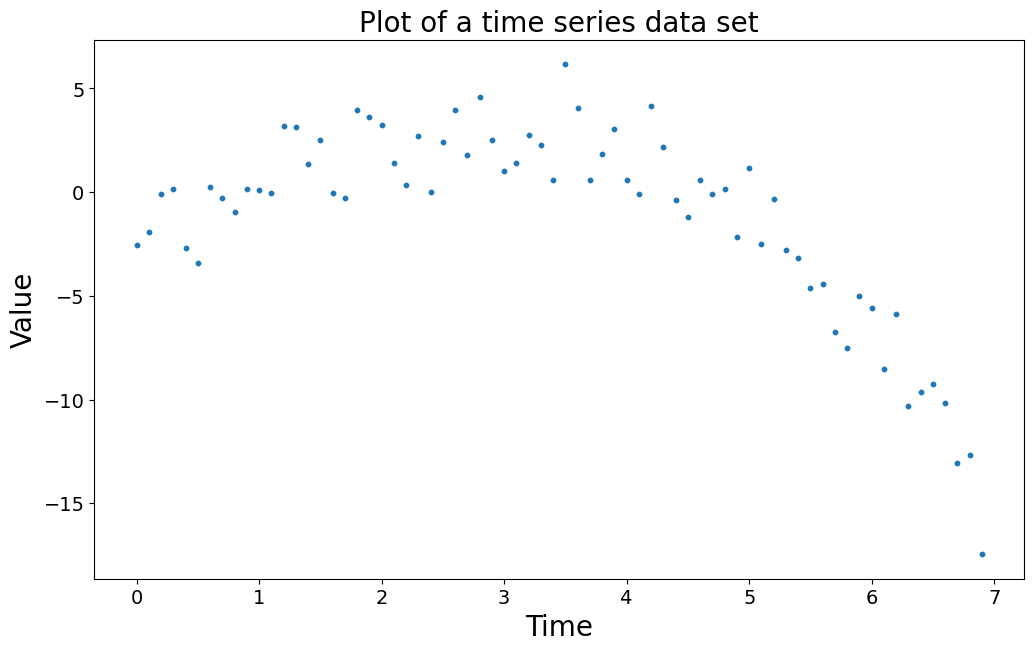

In [7]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
xData = xy_data[:,0]      # First column of array (indexed by 0) contains the x data, by convention it is usually time 
yData = xy_data[:,1]      # Second column of array (indexed by 1) contains the y data

# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]#sets overall dimensions of plot
plt.rcParams['axes.titlesize'] = 20 #size of title
plt.rcParams['axes.labelsize'] = 20 # size of axis label sizes
plt.rcParams['xtick.labelsize'] = 14 # size of numbers on axis scales
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(xData, yData, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Plot of a time series data set')
plt.show()



### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [50]:
# The function should return the coefficient vector beta, the fit, and the vector of residuals


def polyreg(data_matrix, k):
    all_ones = np.ones(np.shape(data_matrix)[0])
    #extracting data
    xData = data_matrix[:,0]      # First column of array (indexed by 0) contains the x data, by convention it is usually time 
    yData = data_matrix[:,1]      # Second column of array (indexed by 1) contains the y data
    n = np.shape(data_matrix)[0] #  returns size n of the n*2 matrix (number of rows)

    #input sanitation
    if k>=n:
        k = n -1 
    
    #creating the x matrix
    columns = [all_ones]
    for i in range(k):
         columns.append(xData**(i+1))
   
    x = np.column_stack(columns)

    # Computing the coefficient vector beta* using least squares formula
    betas = np.linalg.lstsq(x, yData, rcond=None)[0]    

    '''
    #putting the best fit polynomial into a string so it can be printed
    fit = str(betas[0]) 
    for beta in betas:
        if beta == betas[0]:
            pass
        else:
            fit += "  +"+ "  "+ (str(beta)+"x^" + str(np.where(betas == beta)[0][0] + 1) )
    '''
    
    #calculating the vector of residuals
    fitLine = x.dot(betas)
    residualValues = yData - fitLine # difference between y value and y value of our line of best fit
    #print("betas are:",betas)
    return(betas, fitLine, residualValues)
    
polyreg(xy_data,3)
    
    

(array([-1.99933209,  2.48524869, -0.05667063, -0.08211404]),
 array([ -1.99933209,  -1.75145604,  -1.50520609,  -1.26107492,
         -1.01955521,  -0.78113966,  -0.54632094,  -0.31559173,
         -0.08944473,   0.13162738,   0.34713193,   0.55657622,
          0.75946757,   0.9553133 ,   1.14362072,   1.32389714,
          1.4956499 ,   1.65838629,   1.81161364,   1.95483925,
          2.08757046,   2.20931457,   2.3195789 ,   2.41787076,
          2.50369747,   2.57656635,   2.63598471,   2.68145986,
          2.71249913,   2.72860983,   2.72929928,   2.71407478,
          2.68244366,   2.63391324,   2.56799082,   2.48418372,
          2.38199927,   2.26094477,   2.12052754,   1.9602549 ,
          1.77963416,   1.57817264,   1.35537765,   1.11075651,
          0.84381654,   0.55406505,   0.24100936,  -0.09584322,
         -0.45698537,  -0.84290978,  -1.25410913,  -1.6910761 ,
         -2.15430337,  -2.64428364,  -3.16150959,  -3.7064739 ,
         -4.27966925,  -4.88158833,  -5.51

Use the tests below to check the outputs of the function you have written:

In [48]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

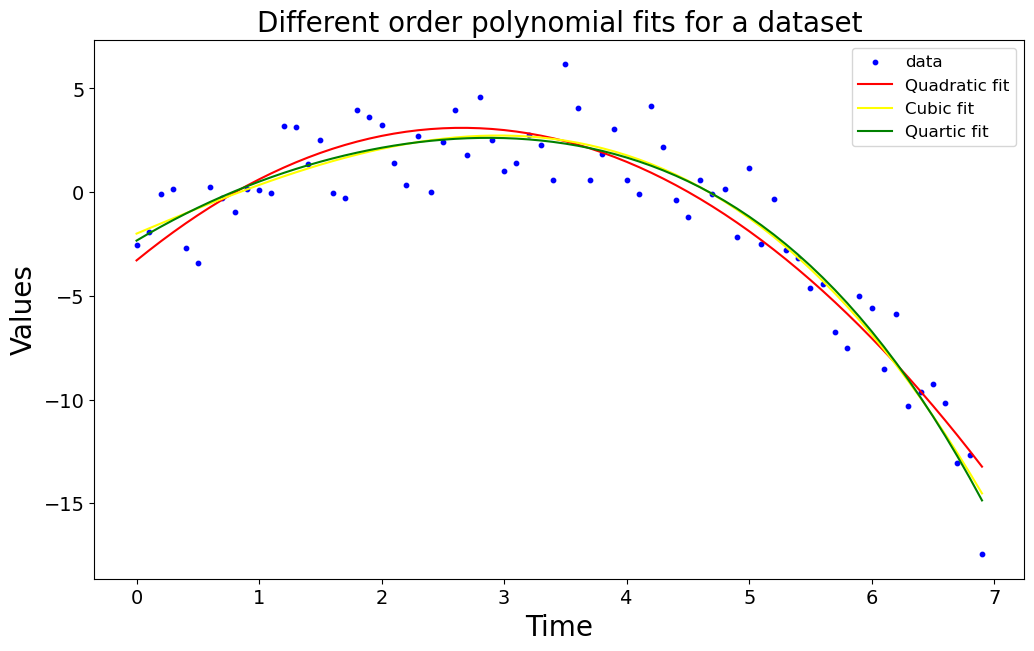

SSE_2 =  172.18  	 R^2_2 =  0.89
SSE_3 =  152.41  	 R^2_3 =  0.9
SSE_4 =  151.23  	 R^2_4 =  0.9


In [54]:
#Your code here

xData = xy_data[:,0]      
yData = xy_data[:,1]

#getting the y values for each line of best fit
fitLineOrder0 = polyreg(xy_data,0)[1]
fitLineOrder2 = polyreg(xy_data,2)[1]
fitLineOrder3 = polyreg(xy_data,3)[1]
fitLineOrder4 = polyreg(xy_data,4)[1]

#calculating each SSE (sum of squared error)
sse_0 = np.linalg.norm(yData -  fitLineOrder0)**2
sse_2 = np.linalg.norm(yData - fitLineOrder2)**2
sse_3 = np.linalg.norm(yData - fitLineOrder3)**2
sse_4 = np.linalg.norm(yData - fitLineOrder4)**2

#Calculating each R^2 value (1 - SSE/SSE_0)     where SSE_0 is sum of squared error for a zero order polynomial (horizontal line of constant y value)
R2_2 = 1 - sse_2/sse_0
R2_3 = 1 - sse_3/sse_0
R2_4 = 1 - sse_4/sse_0

#plotting our polynomial models
plt.scatter(xData, yData, s=10, color ='blue', label = "data")   # s can be used to adjust the size of the dots
plt.plot(xData, fitLineOrder2, color = 'red', label = 'Quadratic fit')
plt.plot(xData, fitLineOrder3, color = 'yellow', label = 'Cubic fit')
plt.plot(xData, fitLineOrder4, color = 'green', label = 'Quartic fit')
plt.legend(fontsize = 'large')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Different order polynomial fits for a dataset')
plt.show()

#printing the sse and R^2 values
print('SSE_2 = ', np.round_(sse_2, 2), ' \t R^2_2 = ', np.round_(R2_2, 2))  
print('SSE_3 = ', np.round_(sse_3, 2), ' \t R^2_3 = ', np.round_(R2_3, 2))
print('SSE_4 = ', np.round_(sse_4, 2), ' \t R^2_4 = ', np.round_(R2_4, 2))



 #### State which model you choose and briefly justify your choice.
 
 
I would pick the cubic polynomial, its SSE and R^2 is very similar to the quartic, and it takes less time to compute.
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

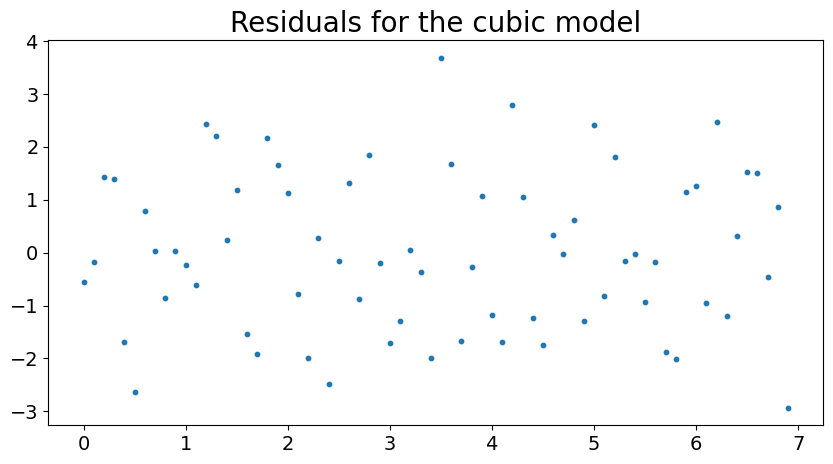

Mean of residuals for quadratic model =  0.0 Variance of residuals =  2.177


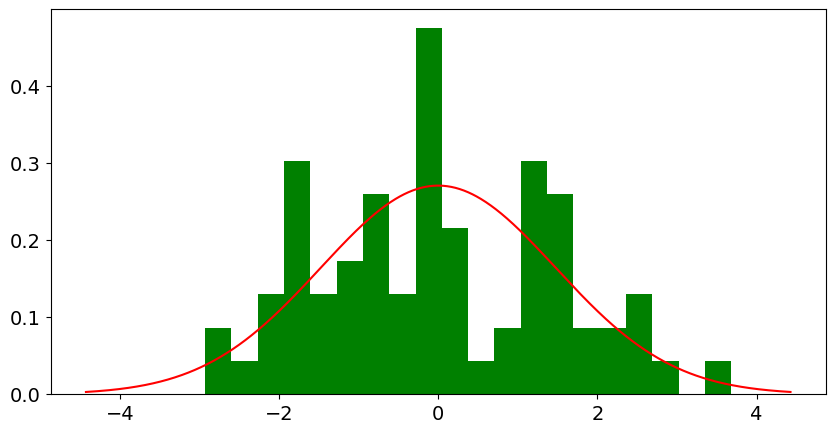

In [58]:
#Your code here
from scipy.stats import norm
# getting the residuals
residuals = polyreg(xy_data,3)[2]

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(xData, residuals, s=10)
plt.title('Residuals for the cubic model')
plt.show()

print('Mean of residuals for quadratic model = ', np.round(np.mean(residuals), 3), 
      "Variance of residuals = ", np.round(np.var(residuals),3)) 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(residuals, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_cubic_stdev = np.std(residuals)  #standard deviation of residuals
xvals = np.linspace(-3*res_cubic_stdev,3*res_cubic_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_cubic_stdev), 'r')
plt.show()